# ML-MAJOR-JUNE-Dhruv Rathore

#### Name: Dhruv Rathore
#### Email: dhruv.rathore99@gmail.com
#### June batch 2





#### __Problem Statement:__

For the given dataset, perform EDA with visualization, formulate 2 questions on the given data and answer the same. Then proceed to to build an ensemble classifier using 3 ML algorithms and find out which algorithm best suits the dataset with respect to the accuracy of the algorithm.
#### __Questions to be answered at the end of EDA:__
   1. Text analysis based on common words used by Males & Females ?
   2. How significant are the color attributes used by the users ?



In [84]:
# Importing necessary packages 

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## __Preliminary Data Assessment__

In [22]:
twitter = pd.read_csv('Information.csv',encoding='latin-1')
twitter.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [23]:
twitter.shape

(20050, 26)

In [24]:
twitter.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


In [25]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [26]:
twitter.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [27]:
twitter.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [20]:
twitter['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          23
2          20
           ..
135000      1
65366       1
24402       1
51025       1
100353      1
Name: tweet_count, Length: 14231, dtype: int64

In [19]:
twitter['retweet_count'].value_counts()

0      19336
1        498
2         56
3         17
6          8
5          7
4          6
7          5
8          3
10         2
12         2
11         2
20         2
19         1
49         1
330        1
36         1
153        1
13         1
23         1
9          1
15         1
Name: retweet_count, dtype: int64

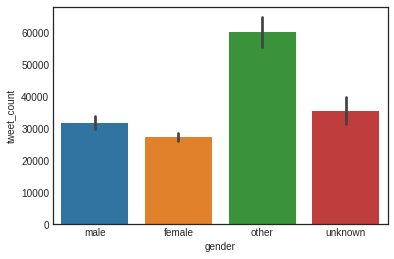

In [22]:
sns.barplot (x = 'gender', y = 'tweet_count',data = twitter)

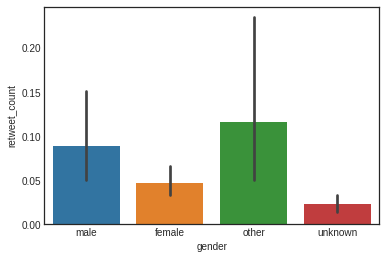

In [23]:
sns.barplot (x = 'gender', y = 'retweet_count',data = twitter)

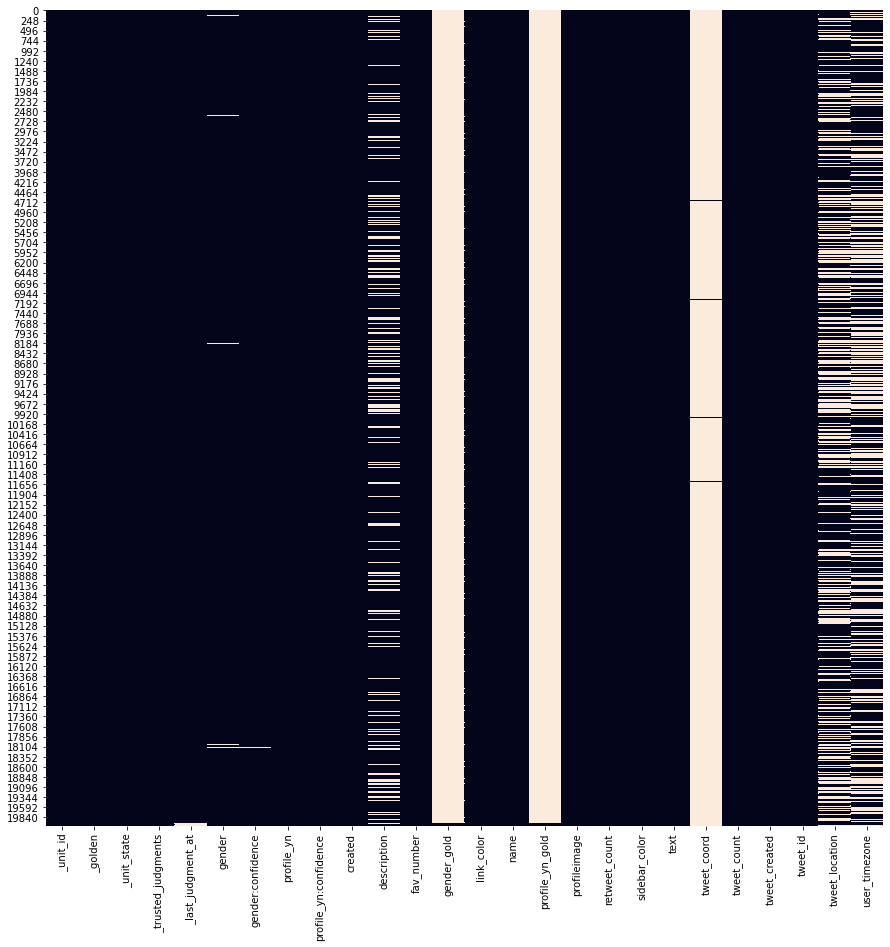

In [28]:
# Visualizing null values to get a better idea of the dataset & it's trends

plt.subplots(figsize=(15,15))
sns.heatmap(twitter.isnull(), cbar=False)

## __Data Exploration & Feature Engineering__
Here we are going to explore the relationships of the independent and dependent variables, modify the features and look for anomalies to present a better dataset for the ML models.

As by observing the above representations
We will reduce down to only the following columns which are required for ML algorithm implimentation :

   1. 'gender'
   2. 'link_color'
   3. 'sidebar_color'
   4. 'text'
   4. 'description'


In [29]:
#Dropping irrelevant columns from dataset

twitter = twitter.drop(['_unit_id', '_golden', '_unit_state', '_last_judgment_at', 'gender:confidence', 'profile_yn', 'profile_yn:confidence', 
                        'created', 'fav_number', 'gender_gold', 'name', 'profile_yn_gold', 'profileimage', 'retweet_count', 
                        'tweet_coord', 'tweet_count', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone', 
                        '_trusted_judgments'], axis = 1)

In [30]:
twitter.head()

,gender,description,link_color,sidebar_color,text
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


In [31]:
twitter['gender'].count()

19953

In [32]:
twitter['gender'].value_counts(dropna=False) 

female     6700
male       6194
brand      5942
unknown    1117
NaN          97
Name: gender, dtype: int64

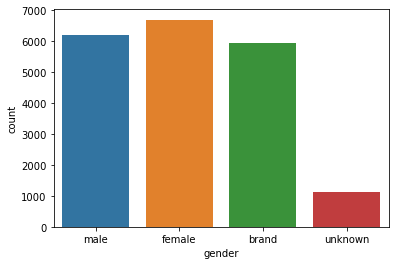

In [33]:
sns.countplot(twitter['gender'],label="Gender")

### __Text Analysis :__

In [34]:
# dropping all the null values from 'gender'

twitter = twitter.dropna(subset=['gender'],how ='any')  
twitter.head()

,gender,description,link_color,sidebar_color,text
0,male,i sing my own rhythm.,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,I'm the author of novels filled with family dr...,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...
2,male,louis whining and squealing and all,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


In [35]:
# Merging the 'text' & 'description' to combine all sorts of text and then find out common words

twitter['text_description'] = twitter['text'].str.cat(twitter['description'], sep=' ')

In [36]:
twitter = twitter.drop(['description','text'],axis=1)

In [37]:
twitter.head()

,gender,link_color,sidebar_color,text_description
0,male,08C2C2,FFFFFF,Robbie E Responds To Critics After Win Against...
1,male,0084B4,C0DEED,ÛÏIt felt like they were my friends and I was...
2,male,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,0084B4,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,female,3B94D9,0,Watching Neighbours on Sky+ catching up with t...


### Text cleaning
In this phase, we will filtering out text and perform other functions like Normalizing, Lemmatizing etc

In [61]:
# Junk words & letters other than the English vocab words are filtered out

def cleaning(s):
    s = str(s)
    s = s.lower()
    s = s.replace(",","")
    s = re.sub('[!@#$_]', '', s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub('\s\W',' ',s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace("[\w*"," ")
    return s

twitter['text_description'] = [cleaning(s) for s in twitter['text_description']]
twitter.head()

,gender,link_color,sidebar_color,text_description
0,male,08C2C2,FFFFFF,robbie e responds to critics after win against...
1,male,0084B4,C0DEED,it felt like they were my friends and i was l...
2,male,ABB8C2,C0DEED,i absolutely adore when louis starts the songs...
3,male,0084B4,C0DEED,hi jordanspieth looking at the url do you use ...
4,female,3B94D9,0,watching neighbours on sky catching up with th...


#### Removing __Stop words__ from 'text_description'

In [62]:
from collections import Counter
words = Counter()
for twit in twitter['text_description']:
    for x in twit.split(' '):
        words[x] += 1

words.most_common(20)

[('the', 17906),
 ('and', 16180),
 ('t', 11193),
 ('i', 10513),
 ('to', 8448),
 ('', 8068),
 ('a', 7873),
 ('of', 7237),
 ('you', 5786),
 ('in', 5372),
 ('for', 5311),
 ('is', 4521),
 ('my', 3970),
 ('s', 3938),
 ('nan', 3733),
 ('it', 3687),
 ('on', 3380),
 ('me', 3044),
 ('with', 2565),
 ('that', 2489)]

These are the number of most common stopwords used in the whole dataset
These words are considered 'noise' which can be eliminated

In [69]:
# Filtering out 'text_description' and printing most commonly used words by elimination stopwords

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
words_filtered = Counter()
for x, y in words.items():
    if not x in stopwords:
        words_filtered[x]=y

words_filtered.most_common(20)

[('', 8068),
 ('nan', 3733),
 ('love', 1647),
 ('like', 1351),
 ('get', 1269),
 ('http', 1130),
 ('one', 1116),
 ('life', 1026),
 ('new', 917),
 ('time', 915),
 ('news', 809),
 ('best', 768),
 ('people', 753),
 ('day', 751),
 ('follow', 713),
 ('world', 689),
 ('go', 685),
 ('music', 677),
 ('make', 667),
 ('know', 654)]

## <u>__Answer 1__ : The most used words by the users are words like Love, Like, Life, Time etc </u>

There is still some trash to clear out such as HTML tags, emojis & unfinished words

In [64]:
# This will clear out the rest of the remaining junk

import re
def preprocessor(text_description):
    text_description = re.sub("[^a-zA-z]", " ",text_description)
    text_description = re.sub('<[^>]*>', '', text_description)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text_description)
    text_description = (re.sub('[\W]+', ' ', text_description.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    return text_description

#### __Lemmatization__
For reducing our vocabulary and consolidate words to their roots, we'll use __stemming / Lemmatizing__ 
We will be using __Porter algorithm__ for stemming


In [70]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text_description): #tokenizer to break down our twits in individual words
    return text_description.split()

def tokenizer_porter(text_description):
    return [porter.stem(word) for word in text_description.split()]

### __Color attribute analysis :__

#### Side bar color >>>

['C0DEED' '0' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC']


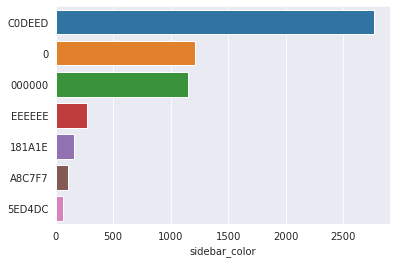

In [86]:
male_sidebar_color = twitter[twitter['gender'] == 'male']['sidebar_color'].value_counts().head(7)
male_sidebar_color_idx = male_sidebar_color.index
male_top_color = male_sidebar_color_idx.values

male_top_color[2] = '000000'
print (male_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid")
sns.barplot (x = male_sidebar_color, y = male_top_color) 

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '65B0DA' '5ED4DC' 'CC3366']


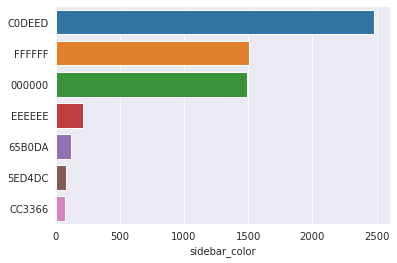

In [87]:
female_sidebar_color = twitter[twitter['gender'] == 'female']['sidebar_color'].value_counts().head(7)
female_sidebar_color_idx = female_sidebar_color.index
female_top_color = female_sidebar_color_idx.values

female_top_color[2] = '000000'
print (female_top_color)

l = lambda x: '#'+x

sns.set_style("darkgrid")
sns.barplot (x = female_sidebar_color, y = female_top_color)

#### Link color >>>

['0084B4' '009999' '3B94D9' '2FC2EF' 'DD2E44' '000000' '0']


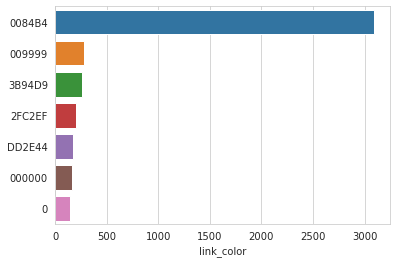

In [73]:
male_link_color = twitter[twitter['gender'] == 'male']['link_color'].value_counts().head(7)
male_link_color_idx = male_link_color.index
male_top_color = male_link_color_idx.values
male_top_color[1] = '009999'
male_top_color[5] = '000000'
print(male_top_color)

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = male_link_color, y = male_link_color_idx)

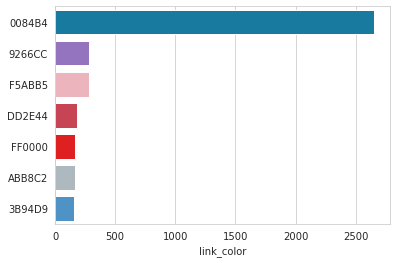

In [74]:
female_link_color = twitter[twitter['gender'] == 'female']['link_color'].value_counts().head(7)
female_link_color_idx = female_link_color.index
female_top_color = female_link_color_idx.values

l = lambda x: '#'+x

sns.set_style("whitegrid", {"axes.facecolor": "white"})
sns.barplot (x = female_link_color, y = female_link_color_idx, palette=list(map(l, female_top_color)))

#### As seen from plots displayed above, most users have not changed the default color of their profile, but if these are discarded, then there is significant dataset to be used for classification.

## <u>__Answer 2__ : The most primiarly used color for both 'sidebar' & 'link color' is Blue followed by Orange and the rest of them. </u>

## __Training & Testing of ML algorithms__
The following classifiers have been chosen for training on the dataset :-

    1. Logistic Regression
    2. Random forest
    3. SVM Classifier

The ML algorithms are trained on each feature of the dataset and the algorithm with the maximum accuracy is the most optimal model for this dataset and the feature that gives maximum accuracy is the optimal feature for classification of this data.

## Training for Text :

In [65]:
# The frequency of the words will be helpful in classifying the gender of the users.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Setting up training and testing data 
encoder = LabelEncoder()
y = encoder.fit_transform(twitter['gender'])
X = twitter['text_description']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#### Modelling on Logistic Regression >>>

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.6002338790511192


#### Modelling on Random Forest >>>

In [38]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.5636485131974608


#### Modelling on SVM >>>

In [39]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.602572669562312


#### __Experimental Results__

Accuracy:

    Logistic Regression: 60.02%
    Random Forest: 56.36%
    SVM: 60.25%

<u>Winner: __SVM__ model</u>


## Training for color attributes :

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(twitter['gender'])
X = twitter['sidebar_color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#### Modelling on Logistic Regression(sidebar_color) >>>

In [77]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.3760441029067825


#### Modelling for Random Forest(sidebar_color) >>>

In [78]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.3737053123955897


#### Modelling for SVM(sidebar_color) >>>

In [79]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.37621115937186766


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(twitter['gender'])
X = twitter['link_color']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

#### Modelling on Logistic Regression(link_color) >>>

In [81]:
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.3720347477447377


/home/dhruv11/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Modelling for Random Forest(link_color) >>>

In [82]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.3745405947210157


#### Modelling for SVM(link_color) >>>

In [83]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.36702305379218175


#### __Experimental Results__

Accuracy for 'sidebar_color':

    Logistic Regression: 37.60%
    Random Forest: 37.37%
    SVM: 37.62%

<u>Winner: __SVM__ model</u>

Accuracy for 'link_color':

    Logistic Regression: 37.20%
    Random Forest: 37.45%
    SVM: 37.70%

<u>Winner: __SVM__ model</u>




### __Conclusion :__
#### As seen from the results above, the SVM Classifier gives the maximum accuracy when trained on the text of users as well as for color attributes in twitter. Hence, The SVM Classifier trained on text is the most optimal model among the considered algorithms.